In [4]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [5]:
data_path = '/home/senthilpalanisamy/work/courses/495_geospatial_vision/sample_drive/small_data'
data_folders = os.listdir(data_path)


In [18]:
results = []
sample_images = []
for image_folder in data_folders:
    
    image_sequence_path = os.path.join(data_path, image_folder)
    image_names = os.listdir(image_sequence_path)
    image_paths = [os.path.join(image_sequence_path, name) for name in image_names]

    sample_image = cv2.imread(image_paths[0], 0)
    h, w = sample_image.shape
    max_gradient = np.zeros((h, w))
    all_frames = []
    for index, path in enumerate(image_paths):
            
        image = cv2.imread(path, 0)
        image =  cv2.equalizeHist(image) 


        sobel = cv2.Sobel(image,cv2.CV_64F,1,0,ksize=5)
        max_gradient = np.maximum(sobel, max_gradient)
        if index == 0:
            image = cv2.imread(path)
            sample_images.append(image)
    results.append(max_gradient)


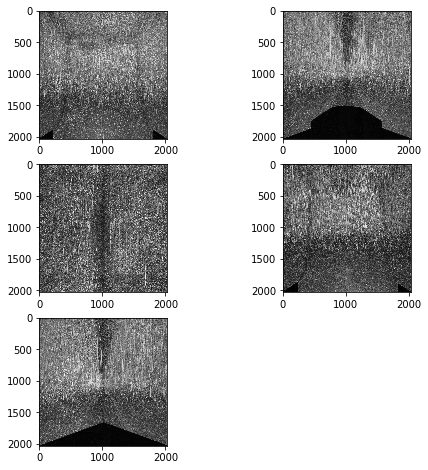

In [7]:
# Showing results
fig=plt.figure(figsize=(8, 8))
rows = 3
cols = 2
for i, image in enumerate(results):
    
    fig.add_subplot(rows, cols, i+1)
    plt.imshow(image, cmap='Greys_r')

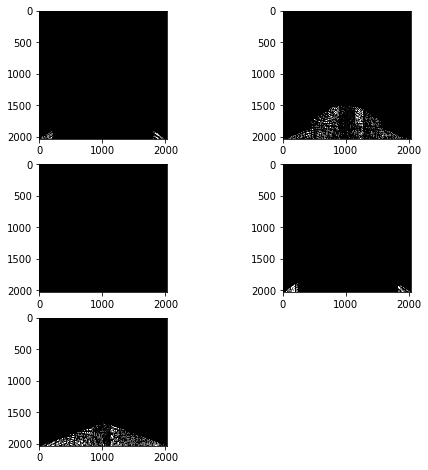

In [24]:
fig2=plt.figure(figsize=(8, 8))
binary_images = []


for i, image in enumerate(results):
    max_gradient = results[i]
    max_gradient[max_gradient > 255] = 255
    ret,binary = cv2.threshold(max_gradient,100,255,cv2.THRESH_TOZERO)
    binary_images.append(255 - binary)
    fig2.add_subplot(rows, cols, i+1)
    plt.imshow(binary_images[-1],cmap='Greys_r')
    #plt.imshow(results[i], cmap='Greys_r')


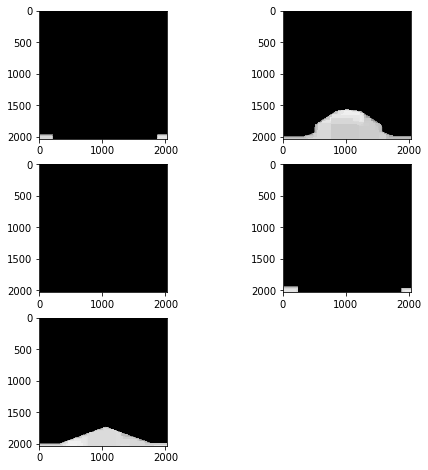

In [9]:
kernel = np.ones((10,10),np.uint8)
fig3=plt.figure(figsize=(8, 8))


closed_images = []
for i, image in enumerate(binary_images):
    #for j in range(50):
    #    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.dilate(image,kernel,iterations = 30)
    image = cv2.erode(image,kernel,iterations = 35)


    fig3.add_subplot(rows, cols, i+1)
    plt.imshow(image,cmap='Greys_r')
    closed_images.append(image)


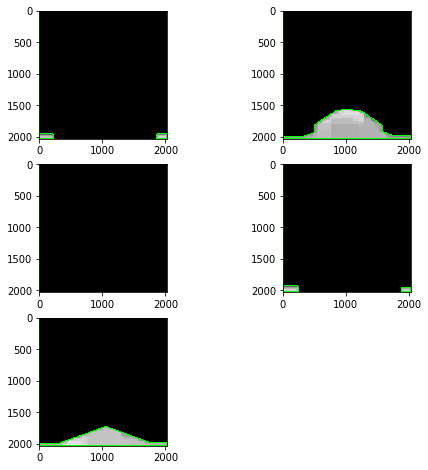

In [20]:
fig4=plt.figure(figsize=(8, 8))
image_results = []

for i, (image, color_image) in enumerate(zip(closed_images, sample_images)):
    contours, hierarchy = cv2.findContours(image.astype(np.uint8),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    # print(contours)
    image = cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_GRAY2BGR)

    cv2.drawContours(image, contours, -1, (0, 255, 0), 15)
    cv2.drawContours(color_image, contours, -1, (0, 255, 0), 15)

    fig4.add_subplot(rows, cols, i+1)
    image_results.append(color_image)

    plt.imshow(image)



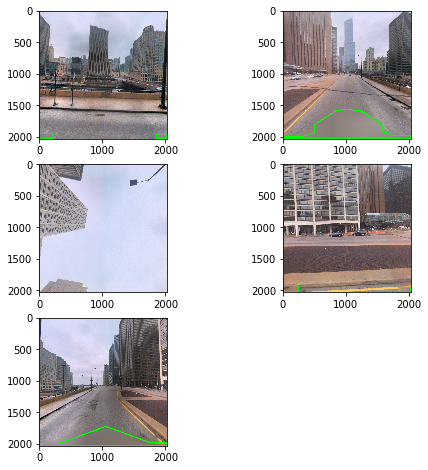

In [21]:
fig5=plt.figure(figsize=(8, 8))
for i, image in enumerate(sample_images):
    fig5.add_subplot(rows, cols, i+1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.array(image)
    plt.imshow(image)

    
    
    

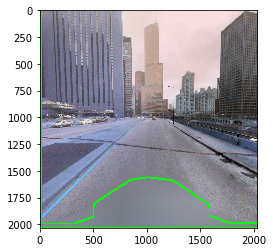

In [25]:
 plt.imshow(sample_images[1])